## Analysis

1: I performed this analysis on at least three different dates and at least three different times. Based on the output each time, I determined there is not a ton of consistency in terms of overall sentiment across each news organization. It is largely dependent upon what is going on in the news at the time. For example, I performed the analysis around 10:30PM on June 27 and the compound sentiment across BBC, CBS, Fox, and CNN was positive while NYTimes was the only negative one. The next day (June 28), I ran it again -- this time was after the Gazette shooting in Maryland and all of the sentiment was negative, except for the NYTimes. Finally, in the most recent analysis I ran on June 30, all of the news sentiment was negative. Point being here that news sentiment is dependent upon what is trending in the news, time of day, day of the week, etc. Further analysis would need to be done to determine if there is a correlated relationship between certain times of the day for each news outlet.

2: Over the past 100 tweets, there appear to have been more 'negative' tweets (tweets with negative compound sentiment score) than 'positive' tweets (tweets with positive compound sentiment score). 

3: All of the news outlets had an overall negative compound sentiment over their past 100 tweets. BBC was the most negative -- this may be due to their in-depth coverage of the World Cup in which they have largely reported on specific losses. Interestingly, BBC had the single tweet with the most positive sentiment score as well as the single tweet with the most negative sentiment score.

New York Times (very close to neutral) and CNN were the least negative, skewing closer to neutral in this particular analysis. Most of CNN's 'positive' tweets appeared to have been 80-100 tweets ago.

In [5]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
# Target Search Terms
news_orgs = ("@BBCWorld", "@CBSNews", "@CNN",
                "@FoxNews", "@nytimes")

#Pull last 100 tweets for each news_org
def get_news_df(news_handle):
    news_tweets  = []
    for status in tweepy.Cursor(api.user_timeline, id=news_handle).items(100):
        news_tweets.append(status)
    df = pd.DataFrame([x._json for x in news_tweets])[['text', 'created_at']]
    df['news_org'] = news_handle
    return df

#Create dataframes
dfs = [get_news_df(x) for x in news_orgs]
df_concat = pd.concat(dfs, axis=0)

#Generate sentiment scores for each tweet
def get_sentiment(tweet_text):
    return analyzer.polarity_scores(tweet_text)

df_concat['sentiment'] = df_concat.text.map(get_sentiment)
df_concat['positive'] = df_concat.sentiment.map(lambda x: x.get('pos'))
df_concat['negative'] = df_concat.sentiment.map(lambda x: x.get('neg'))
df_concat['neutral'] = df_concat.sentiment.map(lambda x: x.get('neu'))
df_concat['compound'] = df_concat.sentiment.map(lambda x: x.get('compound'))
df_concat['tweets_ago'] = df_concat.index + 1

In [7]:
df_concat.head()

,text,created_at,news_org,sentiment,positive,negative,neutral,compound,tweets_ago
0,Mexico elections: Polls due to open after camp...,Sun Jul 01 03:37:05 +0000 2018,@BBCWorld,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249,1
1,Mexico election: Five things you need to know ...,Sat Jun 30 23:48:09 +0000 2018,@BBCWorld,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2
2,"Good week, bad week: The people in the news ht...",Sat Jun 30 23:45:55 +0000 2018,@BBCWorld,"{'neg': 0.243, 'neu': 0.556, 'pos': 0.201, 'co...",0.201,0.243,0.556,-0.1531,3
3,A US civility crisis: Total political war http...,Sat Jun 30 23:27:53 +0000 2018,@BBCWorld,"{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...",0.000,0.615,0.385,-0.8402,4
4,Why female suicide in Afghanistan is so high h...,Sat Jun 30 23:18:10 +0000 2018,@BBCWorld,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",0.000,0.360,0.640,-0.6705,5


In [8]:
#Export Dataframe to CSV file
df_concat.to_csv('News_Tweets_With_Sentiment.csv')

## Sentiment Analysis of Media Tweets

In [9]:
#Define data sets for each news org
bbc = df_concat.loc[df_concat['news_org'] == '@BBCWorld']
cbs = df_concat.loc[df_concat['news_org'] == '@CBSNews']
cnn = df_concat.loc[df_concat['news_org'] == '@CNN']
fox = df_concat.loc[df_concat['news_org'] == '@FoxNews']
nytimes = df_concat.loc[df_concat['news_org'] == '@nytimes']

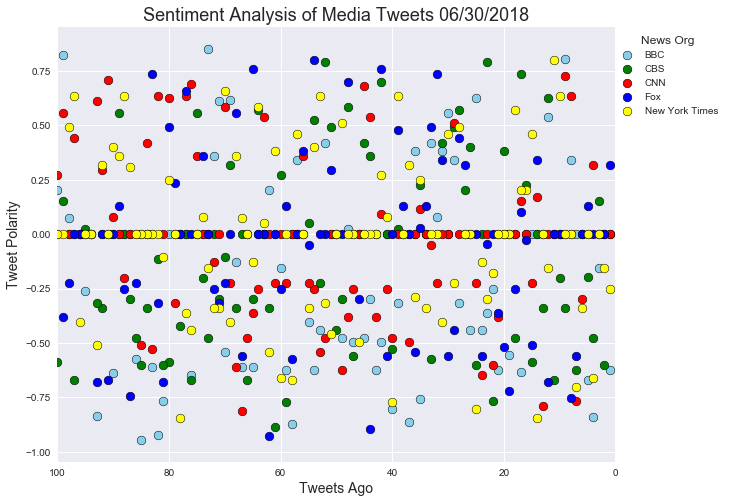

In [10]:
#Generate today's Date
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

sns.set()
plt.figure(figsize=(10,8))

#Create Scatterplot - overlap plots for each news org
bbc_plot = plt.scatter(bbc['tweets_ago'], bbc['compound'], s=75, 
            label ='BBC', c='skyblue', edgecolor='black', linewidth=.5)
cbs_plot = plt.scatter(cbs['tweets_ago'], cbs['compound'], s=75, 
            label ='CBS', c='green', edgecolor='black', linewidth=.5)
cnn_plot = plt.scatter(cnn['tweets_ago'], cnn['compound'], s=75, 
            label ='CNN', c='red', edgecolor='black', linewidth=.5)
fox_plot = plt.scatter(fox['tweets_ago'], fox['compound'], s=75, 
            label ='Fox', c='blue', edgecolor='black', linewidth=.5)
nyt_plot = plt.scatter(nytimes['tweets_ago'], nytimes['compound'], s=75, 
            label ='New York Times', c='yellow', edgecolor='black', linewidth=.5)

#Plot Title and Axis Labels
plt.title(f"Sentiment Analysis of Media Tweets {date}", fontsize="18")
plt.xlabel("Tweets Ago", fontsize="14")
plt.ylabel("Tweet Polarity", fontsize="14")

#Sort plot points by tweets ago, starting with oldest and moving to newest to right
plt.xlim(100,0)

#Create legend
lgnd = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title = 'News Org')

#Create image file
plt.savefig("News_Sentiment_Analysis")

plt.show()

## Overall Media Sentiment based on Twitter

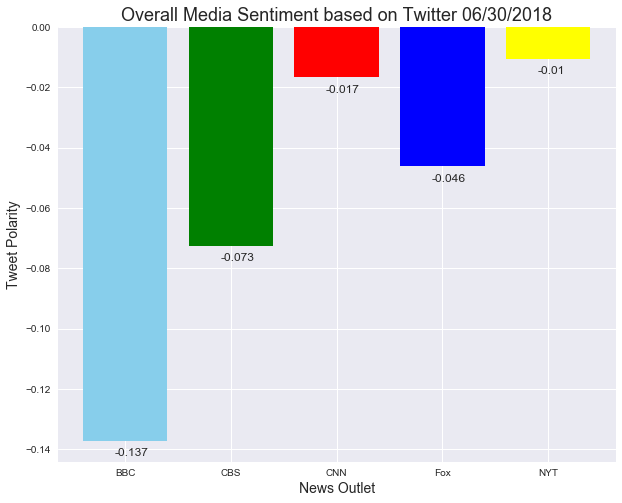

In [11]:
plt.figure(figsize=(10,8))

#Define x-axis and y0axis values for plot chart. X defines bar position. Y value is mean of news_org compound scores. 
x = [0,1,2,3,4]
y = [bbc['compound'].mean(), cbs['compound'].mean(), cnn['compound'].mean(), fox['compound'].mean(), nytimes['compound'].mean()]
color = ['skyblue', 'green', 'red', 'blue', 'yellow' ]

#Define x-axis labels
tick_locations = [x for x in np.arange(5)]
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
plt.xticks(tick_locations, x_labels)

#Create bar plot
plt.bar(x,y, color = color)

#Plot Title and Axis Labels
plt.title(f"Overall Media Sentiment based on Twitter {date}", fontsize="18")
plt.xlabel("News Outlet", fontsize="14")
plt.ylabel("Tweet Polarity", fontsize="14")

#Label bars with numerical sentiment values
for a,b in zip(x, y):
    if b > 0:
        plt.text(a-.1,b+.001,str(round(b,3)))
    else:
        plt.text(a-.1,b-.005,str(round(b,3)))   

#Create image file
plt.savefig("Overall_Media_Sentiment")

plt.show()